# Задание

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. 

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. 

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

+ Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
+ Проведите первичный анализ.
+ Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
+ Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
+ Преобразуйте категориальные признаки.
+ Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
+ Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
+ Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
+ Сформулируйте выводы по проделанной работе.
+ Кратко опишите какие преобразования были сделаны с данными.
+ Сравните точность двух моделей.
+ Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?


Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

# Решение

#### Откроем и исследуем датасет

In [22]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('adult.csv')

In [24]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


15 колонок, почти 50 тыс записей, пропусков на первый взгляд нет, копнем глубже

In [26]:
columns = df.columns.tolist()

In [27]:
for c in columns:
    
    print(df[c].unique())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[226802  89814 336951 ... 129912 255835 257302]
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-

Визуально видно, что есть не очень уместные знаки вопроса в данных

In [28]:
df.profile_report()

#### Да, кажется ключевая проблема в них. Удалим

In [32]:
#Найдем столбцы со знаком вопроса и сложим их в список

del_list = []

for c in columns:
    if '?' in df[c].unique():
        print(c)
        del_list.append(c)

workclass
occupation
native-country


In [33]:
del_list

['workclass', 'occupation', 'native-country']

In [34]:
#Отфильтруем датасет без знаков вопроса

df_upd = df

for d in del_list:
    
    df_upd = df_upd[df_upd[d] != '?']

In [35]:
#Проверим
for c in columns:
    if '?' in df_upd[c].unique():
        print(c)

In [36]:
df_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational-num    45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Пропуски можно было бы заменить на какие-то значения - средние, медианные, модальные и тд. Зависит от задачи, но уровень потерь получился невысоким

#### Построим графики зависимости уровня дохода от  возраста и количества рабочих часов в неделю

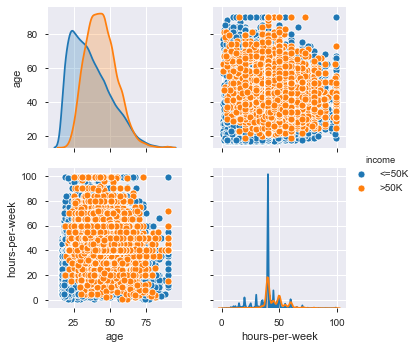

In [37]:
df_spec = df_upd[['age', 'hours-per-week', 'income']]

fig = sns.pairplot(data = df_spec, hue = 'income')
plt.show()

+ среди населения с доходом ниже 50к преимущественно молодые люди, самый частый возраст около 25 лет. Люди с более высоким доходом в среднем старше , их возраст около 45 лет. В этой возрастной группе людей с доходом выше 50к примерно в 2 раза больше чем с меньшим доходом. Примерно к 70 годам достигают равенства возрастные группы по доходам
+ на распределении числа часов очень хорошо видно, что людей с высоким доходом больше в правой половине графика, то есть высокий уровень дохода почти не встречается при низком количестве часов
+ примерно с 65 лет число рабочих часов начинает снижаться у людей в обеих группах по доходам. В низком возрасте в низкой категории дохода встречаются люди с высоким число часов работы в неделю. В низком возрасте с низкими часами - только они. В целом очевидной зависимости уровня дохода одновременно от числа часов и от возраста нет

#### Преобразуем категориальные признаки (one hot encoding для признаков, label encoder для таргета)

In [38]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [43]:
#Возьмем список категориальных переменных
categorical_columns = list(df_upd.columns[df_upd.dtypes == 'object'])

In [44]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [45]:
#Уберем таргет
categorical_columns.pop(-1)
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [46]:
oh_encoder = OneHotEncoder(sparse = False)

In [47]:
#энкодим
en_cat_df = pd.DataFrame(oh_encoder.fit_transform(df_upd[categorical_columns]))
en_cat_df.columns = oh_encoder.get_feature_names(input_features = categorical_columns)

In [48]:
en_cat_df.shape

(45222, 98)

In [49]:
df_upd.shape

(45222, 15)

In [50]:
df_upd = df_upd.reset_index()

In [51]:
#убираем старые столбцы
for c in categorical_columns:
    del df_upd[c]

In [52]:
df_upd.shape

(45222, 8)

In [53]:
#добавляем новые
df_upd_ = pd.concat([df_upd, en_cat_df], axis = 1)

In [54]:
df_upd_.shape

(45222, 106)

In [55]:
df_upd_.head()

,index,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,25,226802,7,0,0,40,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,38,89814,9,0,0,50,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,28,336951,12,0,0,40,>50K,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,44,160323,10,7688,0,40,>50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,34,198693,6,0,0,30,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
#Таргет
le = LabelEncoder()

In [57]:
df_upd_['target'] = le.fit_transform(df_upd_['income'])

In [58]:
del df_upd_['income']

In [59]:
df_upd_.head()

,index,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,target
0,0,25,226802,7,0,0,40,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,1,38,89814,9,0,0,50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,2,28,336951,12,0,0,40,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,3,44,160323,10,7688,0,40,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,5,34,198693,6,0,0,30,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


#### Обучим Logistic Regression и потестируем

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [61]:
#Делим на таргет и признаки
X = df_upd_.iloc[:, :-1]
y = df_upd_.iloc[:, -1:]

In [62]:
X.shape

(45222, 105)

In [63]:
y.shape

(45222, 1)

In [64]:
#делим на тест и тренировку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:
#вызываем модель
lr = LogisticRegression()

In [66]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [68]:
lr.predict_proba(X_test)

array([[0.76051422, 0.23948578],
       [0.49087446, 0.50912554],
       [0.78260562, 0.21739438],
       ...,
       [0.70645012, 0.29354988],
       [0.69970851, 0.30029149],
       [0.78325465, 0.21674535]])

#### Считаем точность  (score и руками)

In [69]:
#Тренировочная выборка
lr.score(X_train, y_train) 

0.7916355695607706

In [70]:
#Тестовая выборка
lr.score(X_test, y_test) 

0.7896075179657269

Посчитаем руками

In [71]:
import numpy as np

In [72]:
n = 0
for i in zip(list(np.array(y_test['target'])), list(y_pred)):
    if i[0] == i[1]:
        n += 1

In [73]:
#тот же результат
n / len(y_pred)

0.7896075179657269

#### Обучим SVC и потестируем

In [74]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [75]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 

In [76]:
clf.fit(X_train, y_train.values.ravel())

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [77]:
clf.score(X_train, y_train) 

0.8587776764242474

In [78]:
clf.score(X_test, y_test)

0.8463239358761747

#### Выводы

+ Убрали  пропуски
+ Выделили категориальные переменные и кодировали их. OH encoding для признаков (чтобы избежать цифровых интепретаций для равносильных категорий), LE для таргета (2 категории)
+ Получили довольно высокий score на модели lr (~ 79%), лучше результаты на SVC (~ 85%) 
+ Алгоритм SVC требует гораздо больше ресурсов даже на учебном размере данных
+ Точность 85% довольно высока, тем более в контексте данной задачи
+ Можно улучшить результаты: проанализировать и очистить данные на предметов шумов и выбросов, оценить важность тех или иных параметров, определить что важнее - угадать высокий или низкий уровень дохода и тд. 